## In the following we use odeint:

Computed y(t_end): 1.6933018649487648e+85


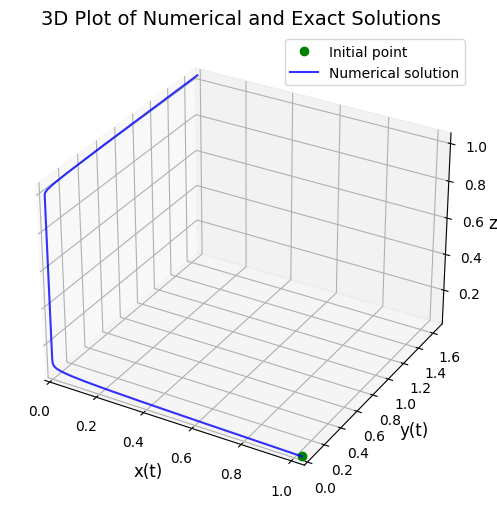

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the system of ODEs
def fast_system(y, t, eps):
    x, y, z = y
    dxdt = -x
    dydt = 2 * y + eps * x
    dzdt = eps * (x**2 + 1)
    return [dxdt, dydt, dzdt]

# Parameters
t_end = 100
eps = 0.01
t = np.linspace(0, t_end, 200)
x_init, y_init, z_init = 1.0 + 3 * eps, 0.0 + 2 * eps, 0.0 + 3 * eps  # Initial conditions

# Solve the system
y0 = [x_init, y_init, z_init]
solution = odeint(fast_system, y0, t, args=(eps,))

# Extract solutions
x_sol, y_sol, z_sol = solution.T
print("Computed y(t_end):", y_sol[-1])

# Create the 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Initial point
ax.plot([x_init], [y_init], [z_init], 'go', label='Initial point')

# Numerical solution
ax.plot(x_sol, y_sol, z_sol, '-', color='blue', label='Numerical solution', alpha=0.8)

ax.set_xlim([np.min(x_sol), np.max(x_sol)])
ax.set_ylim([np.min(y_sol), np.max(y_sol)])
ax.set_zlim([np.min(z_sol), np.max(z_sol)])


# Labels and title
ax.set_title('3D Plot of Numerical and Exact Solutions', fontsize=14)
ax.set_xlabel('x(t)', fontsize=12)
ax.set_ylabel('y(t)', fontsize=12)
ax.set_zlabel('z(t)', fontsize=12)
ax.legend()
plt.show()


## y(t) grows significantly (see the last fig below) but the 3D plot still doesn’t show it and the issue probably lies with the 3D plot’s scaling.

In [10]:
k=10
print('ending (x,y,z)=', x_sol[k],  y_sol[k], z_sol[k])

ending (x,y,z)= 0.0067678840304755536 542.75408804603 0.0855555257532158


In [16]:
print("y(t) values:", y_sol[:10], "...", y_sol[-10:])
print("Range of x(t):", np.min(x_sol), np.max(x_sol))
print("Range of y(t):", np.min(y_sol), np.max(y_sol))
print("Range of z(t):", np.min(z_sol), np.max(z_sol))


y(t) values: [2.00000000e-02 1.73642567e-01 1.30493464e+00 9.74289654e+00
 7.27191842e+01 5.42754106e+02 4.05095021e+03 3.02350489e+04
 2.25665125e+05 1.68429522e+06] ... [1.70235678e+164 1.27058684e+165 9.48327019e+165 7.07802177e+166
 5.28281818e+167 3.94293333e+168 2.94288440e+169 2.19647858e+170
 1.63938419e+171 1.22358604e+172]
Range of x(t): 1.4254136818406977e-87 1.03
Range of y(t): 0.02 1.2235860403363878e+172
Range of z(t): 0.03 2.035304498404422


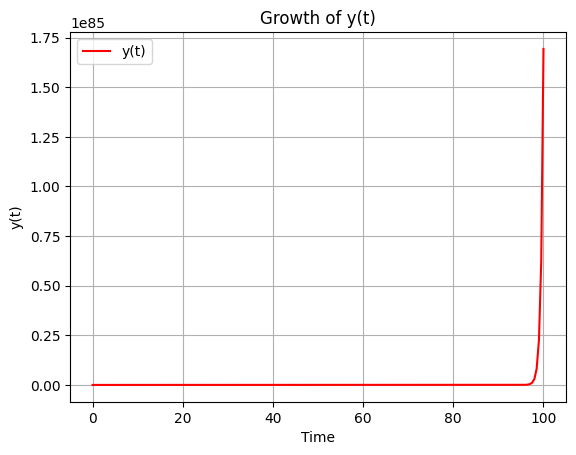

In [23]:
plt.figure()
plt.plot(t, y_sol, label='y(t)', color='red')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Growth of y(t)')
plt.grid()
plt.legend()
plt.show()


## In the following, we use solve_ivp with a method such as "BDF" (better suited for stiff systems)

Computed y(t_end): 2.303289094021995e+85


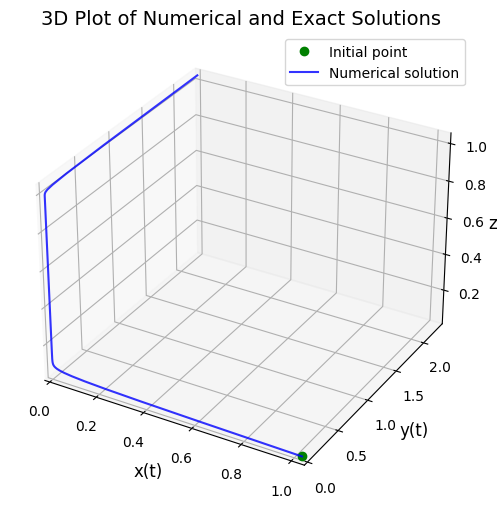

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the system of ODEs
def fast_system(t, y, eps):
    x, y, z = y
    dxdt = -x
    dydt = 2 * y + eps * x
    dzdt = eps * (x**2 + 1)
    return [dxdt, dydt, dzdt]

# Parameters
t_end = 100
eps = 0.01
t_eval = np.linspace(0, t_end, 200)  # Time points where solution is evaluated
x_init, y_init, z_init = 1.0 + 3 * eps, 0.0 + 2 * eps, 0.0 + 3 * eps  # Initial conditions

# Solve the system using solve_ivp
y0 = [x_init, y_init, z_init]
solution = solve_ivp(
    fast_system, 
    [0, t_end], 
    y0, 
    method="BDF",  # Use BDF for stiff systems
    t_eval=t_eval, 
    args=(eps,)
)

# Extract solutions
x_sol, y_sol, z_sol = solution.y
print("Computed y(t_end):", y_sol[-1])

# Create the 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Initial point
ax.plot([x_init], [y_init], [z_init], 'go', label='Initial point')

# Numerical solution
ax.plot(x_sol, y_sol, z_sol, '-', color='blue', label='Numerical solution', alpha=0.8)

ax.set_xlim([np.min(x_sol), np.max(x_sol)])
ax.set_ylim([np.min(y_sol), np.max(y_sol)])
ax.set_zlim([np.min(z_sol), np.max(z_sol)])

# Labels and title
ax.set_title('3D Plot of Numerical and Exact Solutions', fontsize=14)
ax.set_xlabel('x(t)', fontsize=12)
ax.set_ylabel('y(t)', fontsize=12)
ax.set_zlabel('z(t)', fontsize=12)
ax.legend()
plt.show()
